<a href="https://colab.research.google.com/github/damianmtz98/Deep_Learning/blob/main/ProyectoFinal_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion de tipo de cambio del Dólar (USD/MXN)**

 Nuestro objetivo principal es crear un modelo que nos ayude a predecir el tipo de cambio del dólar (USD), teniendo en cuenta diferentes índices, valor de otras monedas respecto al dólar, tambien el precio del oro y petróleo.
 El tipo de cambio afecta en mucho la economía mundial y el dólar es una moneda dominante, este proyecto nos ayudaría para tomar medidas o decisiones economicas para evitar que nos afecte y en el mejor de los casos obtener un beneficio.

 Las variables a considerar son las siguientes:



*   USD/MXN: Precio dólar a peso mexicano.
*   USD/EUR: Precio dólar a euro.
*   USD/JPY: Precio dólar a yen.
*   OIL: Precio del petróleo.
*   GOLD: Precio oro.
*   S&P500: Índice bursátil.
*   DowJones: Índice bursátil.
*   TasaDesempleoUSA: Tasa de desempleo en USA.

Todos estos datos son sacados de Yahoo Finance, y son de los últimos 5 años.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [ ]:
df = pd.read_csv("usdmxn.csv")
df.head(5)

,Date,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,16/07/2018,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,23/07/2018,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,30/07/2018,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,06/08/2018,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,13/08/2018,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              263 non-null    object 
 1   USD/MXN           263 non-null    float64
 2   USD/EUR           263 non-null    float64
 3   USD/JPY           263 non-null    float64
 4   Oil               262 non-null    float64
 5   Gold              263 non-null    float64
 6   S&P500            263 non-null    float64
 7   DowJones          263 non-null    float64
 8   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8), object(1)
memory usage: 18.6+ KB


In [ ]:
df.shape

#Observamos que tenemos 263 datos y 9 columnas.

(263, 9)

In [ ]:

df = df.drop(columns=['Date'])
df.head()

#Quitamos la columna 'Date' porque no se tomara en cuenta.

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
0,19.01,1.17,111.43,75.35,1977.5,4565.72,35061.21,3.9
1,18.61,1.17,111.04,75.42,1960.1,4505.42,34509.03,3.9
2,18.54,1.16,111.26,73.86,1926.2,4398.95,33734.88,3.9
3,18.90,1.14,110.87,70.64,1921.1,4450.38,34407.60,3.9
4,18.88,1.15,110.49,69.16,1919.1,4348.33,33727.43,3.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USD/MXN           263 non-null    float64
 1   USD/EUR           263 non-null    float64
 2   USD/JPY           263 non-null    float64
 3   Oil               262 non-null    float64
 4   Gold              263 non-null    float64
 5   S&P500            263 non-null    float64
 6   DowJones          263 non-null    float64
 7   TasaDesempleoUSA  263 non-null    float64
dtypes: float64(8)
memory usage: 16.6 KB


In [ ]:
df.shape

#Confirmamos que ya no se tome en cuenta la columna 'Date'

(263, 8)

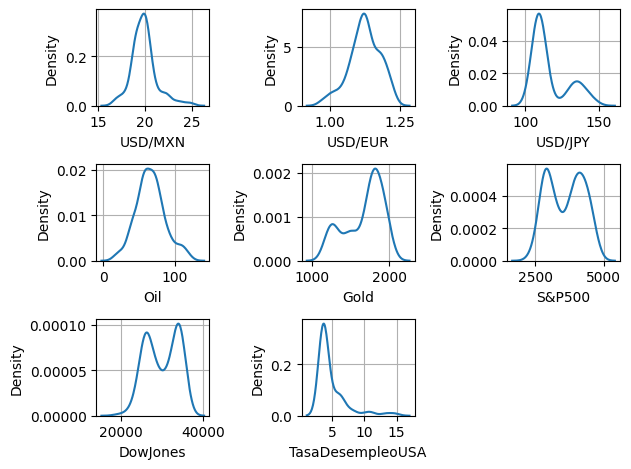

In [ ]:
# Utilzamos la KDE, para poder visualizar que distribucíon siguen nuestras variables.

r=3
c=3
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.kdeplot(x = df.loc[:,i], data = df)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

A simple vista podemos observar que nuestras variables USD/MXN, USD/EUR y OIL siguen una distribución normal, la variable TasaDesempleoUSA pareciera que también pude seguir la misma distribución.

Respecto a nuestras variables restantes siguen una distribución binomial en este caso son	USD/JPY, Gold,	S&P500,	DowJones.

Tambien notamos que:

*   USD/MXN tiene la mayor densidad entre los 20 pesos.
*   En la tasa de desempleo en USA su mayor densidad ronda entre el 3 y 4 por ciento.
*   USD/JPY tiene una mayor densidad en el precio 110 y otra muy baja que esta entre 130 y 140.




In [ ]:
#Realizamos la matriz de correlación para saber como se relacionan las variables entre sí.

matriz_correlacion = df.corr()

In [ ]:
matriz_correlacion

,USD/MXN,USD/EUR,USD/JPY,Oil,Gold,S&P500,DowJones,TasaDesempleoUSA
USD/MXN,1.000000,0.115111,-0.399975,-0.130282,0.320374,0.330666,0.313462,0.724969
USD/EUR,0.115111,1.000000,-0.765115,-0.187318,0.665446,0.349425,0.280017,0.309904
USD/JPY,-0.399975,-0.765115,1.000000,-0.217841,-0.880792,-0.736590,-0.665180,-0.409217
Oil,-0.130282,-0.187318,-0.217841,1.000000,0.251647,0.618258,0.657634,-0.076170
Gold,0.320374,0.665446,-0.880792,0.251647,1.000000,0.774284,0.702287,0.298183
S&P500,0.330666,0.349425,-0.736590,0.618258,0.774284,1.000000,0.979900,0.390140
DowJones,0.313462,0.280017,-0.665180,0.657634,0.702287,0.979900,1.000000,0.368149
TasaDesempleoUSA,0.724969,0.309904,-0.409217,-0.076170,0.298183,0.390140,0.368149,1.000000


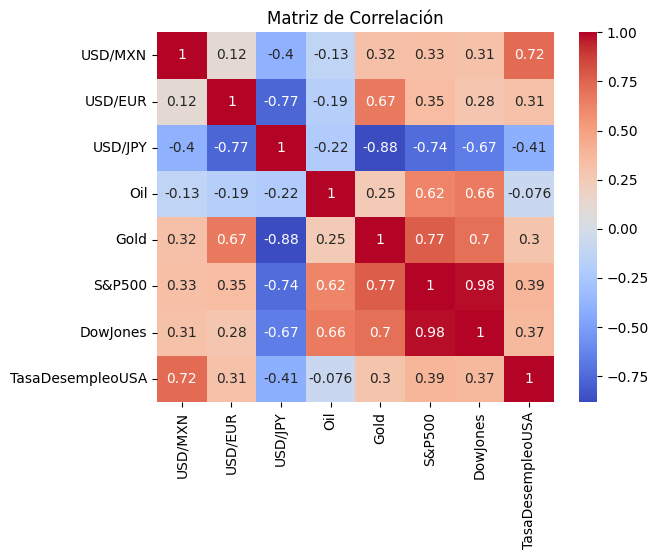

In [ ]:
#Mostramos el mapa de calor de la matriz de correlación.

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


* La tasa de desempleo en USA y el precio del USD/MXN tienen una correlacion positiva y esto significa que si una aumenta la otra igual. También estas dos tienen una correlación positiva con el oro y los índices S&P500 y Dow Jones aunque esta relación es debil y se puede decir que se pueden influenciar un poco entre sí.

* USD/JPY tiene una relación negativa con todas las demas variables, esto quiere decir que si los demas suben de precio, USD/JPY baja.

* Los índices S&P500 y Dow Jones siguen una correlación positiva con todas las demás variables excepto USD/JPY, el USD/MXN y USD/EUR siguen una relacion positiva pero debil con estos dos índices en comparación con el petróleo y el oro que tienen una correlación positiva con mas del 0.60. Concluyendo este punto podemos decir que estos índices van de la mano con los precios de nuestras variables.


# **Prediccion del tipo de cambio usando Redes Neuronales**

In [ ]:
# Eliminar filas con valores NaN
df.dropna(inplace=True)

X = df.drop(columns=['USD/MXN'])
y = df['USD/MXN']

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evalua
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on Test Data:', loss)


Epoch 1/100
7/7 [==============================] - 4s 5ms/step - loss: 391.8210
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 380.3335
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 366.8985
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 351.2998
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 333.0801
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 311.3496
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 285.6850
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 255.2487
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 220.3503
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 181.9635
Epoch 11/100
7/7 [==============================] - 0s 4ms/step - loss: 141.4667
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 102.0574
Epoch 13/100
7/7 [===================

In [ ]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(X_test)

print("Algunas predicciones:")
for i in range(10):
    print("Valor real:", y_test.iloc[i], "Predicción:", predictions[i][0])


2/2 [==============================] - 0s 7ms/step
Algunas predicciones:
Valor real: 17.97 Predicción: 19.792364
Valor real: 19.93 Predicción: 18.932272
Valor real: 20.03 Predicción: 18.77241
Valor real: 20.7 Predicción: 18.65154
Valor real: 19.05 Predicción: 20.602976
Valor real: 21.31 Predicción: 20.737684
Valor real: 21.73 Predicción: 17.28605
Valor real: 16.74 Predicción: 21.042692
Valor real: 18.81 Predicción: 21.633467
Valor real: 22.33 Predicción: 20.884136


In [ ]:


# Crear un DataFrame con los valores reales y las predicciones
predictions_df = pd.DataFrame({
    'Valor Real (USD/MXN)': y_test.values.flatten(),
    'Predicción del Modelo (USD/MXN)': predictions.flatten()
                              })

print(predictions_df.head(10))


   Valor Real (USD/MXN)  Predicción del Modelo (USD/MXN)
0                 17.97                        19.792364
1                 19.93                        18.932272
2                 20.03                        18.772409
3                 20.70                        18.651541
4                 19.05                        20.602976
5                 21.31                        20.737684
6                 21.73                        17.286051
7                 16.74                        21.042692
8                 18.81                        21.633467
9                 22.33                        20.884136


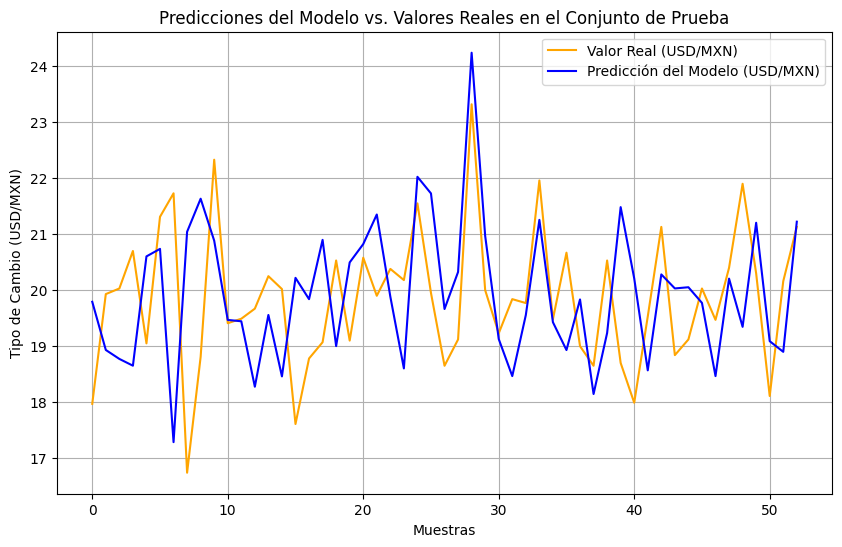

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valor Real (USD/MXN)', color='orange')
plt.plot(predictions, label='Predicción del Modelo (USD/MXN)', color='blue')
plt.title('Predicciones del Modelo vs. Valores Reales en el Conjunto de Prueba')
plt.xlabel('Muestras')
plt.ylabel('Tipo de Cambio (USD/MXN)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.optimizers import RMSprop
# Construir el modelo de red neuronal con RMSprop como optimizador
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

#Compilar
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

#Entrenar
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluar
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on Test Data:', loss)


Epoch 1/100
7/7 [==============================] - 1s 6ms/step - loss: 397.0179
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 379.0125
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 362.4508
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 345.1057
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 325.7164
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 304.1373
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 280.2266
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 253.9781
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 226.0906
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 196.8610
Epoch 11/100
7/7 [==============================] - 0s 7ms/step - loss: 166.8135
Epoch 12/100
7/7 [==============================] - 0s 5ms/step - loss: 136.8426
Epoch 13/100
7/7 [==================

In [ ]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Imprimir algunas de las predicciones
print("Algunas predicciones:")
for i in range(10):
    print("Valor real:", y_test.iloc[i], "Predicción:", predictions[i][0])

2/2 [==============================] - 0s 11ms/step
Algunas predicciones:
Valor real: 17.97 Predicción: 19.48248
Valor real: 19.93 Predicción: 19.485155
Valor real: 20.03 Predicción: 19.26094
Valor real: 20.7 Predicción: 19.104546
Valor real: 19.05 Predicción: 20.309288
Valor real: 21.31 Predicción: 20.946754
Valor real: 21.73 Predicción: 18.002304
Valor real: 16.74 Predicción: 20.32169
Valor real: 18.81 Predicción: 21.423264
Valor real: 22.33 Predicción: 21.561543


2/2 [==============================] - 0s 7ms/step


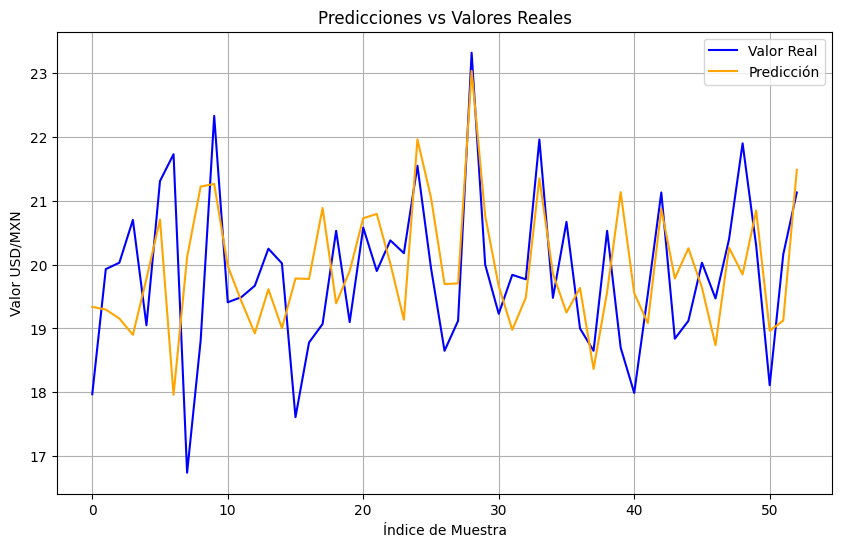

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Crear una gráfica de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valor Real', color='blue')
plt.plot(predictions, label='Predicción', color='orange')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor USD/MXN')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.optimizers import SGD



#SGD
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilar
model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error')

# Entrenr
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluar
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on Test Data:', loss)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 393.0215
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 340.1133
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 219.2498
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 42.7630
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 12.1453
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 10.9043
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 9.8747
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 9.0085
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 8.2688
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 7.5686
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 7.0384
Epoch 12/100
7/7 [==============================] - 0s 4ms/step - loss: 6.5352
Epoch 13/100
7/7 [==============================] - 

In [ ]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Imprimir algunas de las predicciones
print("Algunas predicciones:")
for i in range(10):
    print("Valor real:", y_test.iloc[i], "Predicción:", predictions[i][0])


2/2 [==============================] - 0s 7ms/step
Algunas predicciones:
Valor real: 17.97 Predicción: 19.338125
Valor real: 19.93 Predicción: 19.29629
Valor real: 20.03 Predicción: 19.155787
Valor real: 20.7 Predicción: 18.900549
Valor real: 19.05 Predicción: 19.779732
Valor real: 21.31 Predicción: 20.706654
Valor real: 21.73 Predicción: 17.960497
Valor real: 16.74 Predicción: 20.117199
Valor real: 18.81 Predicción: 21.222376
Valor real: 22.33 Predicción: 21.26474


2/2 [==============================] - 0s 6ms/step


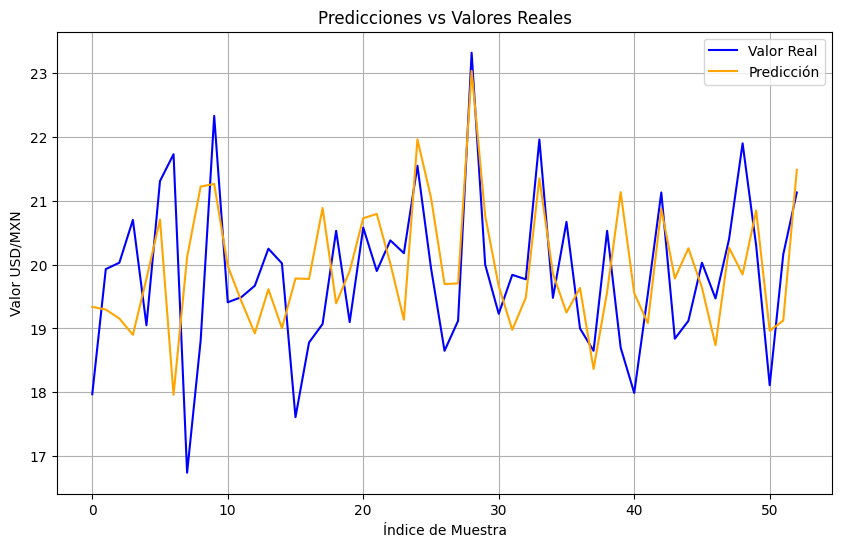

In [ ]:
import matplotlib.pyplot as plt

# Obtener predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Crear una gráfica de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valor Real', color ='blue')
plt.plot(predictions, label='Predicción', color = 'orange')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor USD/MXN')
plt.legend()
plt.grid(True)
plt.show()
